# Inaugural Project

Imports and set magics:

In [196]:

# import modules
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# Question 1

**Code for solving the model**

In [198]:
model = HouseholdSpecializationModelClass()

# vector of alpha and sigma
alpha_vec = [0.25, 0.50, 0.75]
sigma_vec = [0.5, 1.0, 1.5]

# lists
HF_HM_list = []
alpha_list = []
sigma_list = []

# solve model for alpha, sigma and HF_HM
for alpha in alpha_vec:
    model.par.alpha = alpha
    for sigma in sigma_vec:
        model.par.sigma = sigma
        opt = model.solve_discrete()
        HF_HM = opt.HF / opt.HM
        HF_HM_list.append(HF_HM)
        alpha_list.append(alpha)
        sigma_list.append(sigma)
        #print(f'HF/HM = {HF_HM:.3f} for alpha = {alpha}, sigma = {sigma}')

c:\Users\jonas\OneDrive - University of Copenhagen\Desktop\Prognum\projects-2023-jts\inauguralproject\inauguralproject.py:61: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


In [199]:
# dataframe
df = pd.DataFrame({'alpha': alpha_list, 'sigma': sigma_list, 'HF/HM': HF_HM_list})

# pivot table
table = pd.pivot_table(df, values='HF/HM', index='sigma', columns='alpha')

# Print the pivot table
print(table)

alpha      0.25  0.50      0.75
sigma                          
0.5    0.545455   1.0  1.833333
1.0    0.307692   1.0  3.250000
1.5    0.214286   1.0  4.666667


# Question 2

Code for solving the model

In [200]:
model = HouseholdSpecializationModelClass()

# calculate list of log(HF/HM) and log(wF/wM)
log_HF_HM_list = []
log_wF_wM_list = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    opt = model.solve_discrete()
    log_HF_HM = np.log(opt.HF/opt.HM)
    log_HF_HM_list.append(log_HF_HM)
    log_wF_wM = np.log(wF/model.par.wM)
    log_wF_wM_list.append(log_wF_wM)


print(log_HF_HM_list)
print(log_wF_wM_list)

[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


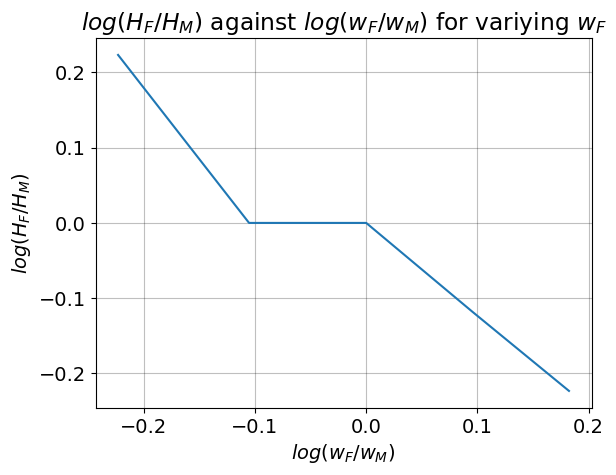

In [201]:
# figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_wF_wM_list,log_HF_HM_list)

ax.set_title('$log(H_F/H_M)$ against $log(w_F/w_M)$ for variying $w_F$')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

# Question 3

Explain your code and procedure

In [202]:
model = HouseholdSpecializationModelClass()

# calculate list of log(HF/HM) and log(wF/wM)
c_log_HF_HM_list = []
c_log_wF_wM_list = []

for wF in model.par.wF_vec:
    model.par.wF = wF
    opt = model.solve()
    c_log_HF_HM = np.log(opt.HF/opt.HM)
    c_log_HF_HM_list.append(c_log_HF_HM)
    c_log_wF_wM = np.log(wF/model.par.wM)
    c_log_wF_wM_list.append(c_log_wF_wM)


print(c_log_HF_HM_list)
print(c_log_wF_wM_list)

[0.22519958544128285, 9.754729058551197e-05, 2.154359799344263e-09, -8.680131447473675e-05, -0.18662625800161153]
[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


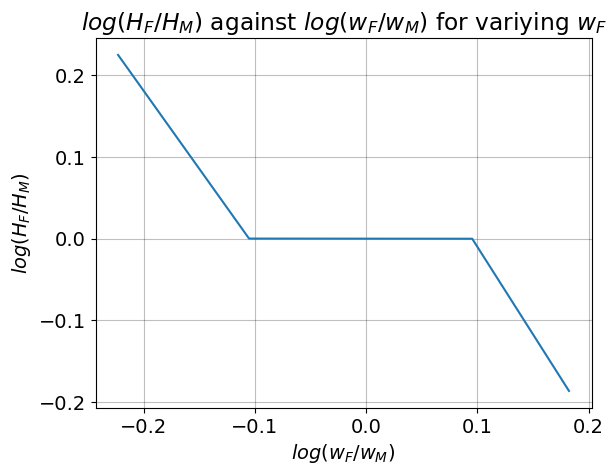

In [203]:
# figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(c_log_wF_wM_list,c_log_HF_HM_list)

ax.set_title('$log(H_F/H_M)$ against $log(w_F/w_M)$ for variying $w_F$')
ax.set_xlabel('$log(w_F/w_M)$')
ax.set_ylabel('$log(H_F/H_M)$');

ADD CONCISE CONLUSION.